In [44]:
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png',width=500)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


In [46]:
df = pd.read_csv('/content/Iris.csv')

In [47]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [49]:
df_copy=df.copy()

In [50]:
df_copy

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
df_copy.drop(columns=['Id'],axis=0,inplace=True)

In [52]:
df_copy.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [53]:
df_copy.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 6


In [54]:
df_copy.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
df_copy.size

750

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
df_copy.columns = ['sl','sw','pl','pw','species']
df_split_iris=df_copy.species.str.split('-',n=-1,expand=True)
df_split_iris.drop(columns=0,axis=1,inplace=True)
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [58]:
df3_full=df_copy.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [59]:
df3_full.drop(columns='species',axis=1,inplace=True) #Drop excessive column

In [60]:
df3_full

,sl,sw,pl,pw,1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [61]:
df3_full.shape

(150, 5)

In [62]:
df3_full.isna()

,sl,sw,pl,pw,1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [63]:
df3_full.isna().sum()

,0
sl,0
sw,0
pl,0
pw,0
1,0


In [64]:
import pandas as pd
# Assuming 's' is the column with categorical data like 'setosa'
df3_full_numeric = df3_full.select_dtypes(include=['number'])  # Select only numeric columns
df3_full_numeric.corr()  # Calculate correlation matrix on numeric data

,sl,sw,pl,pw
sl,1.000000,-0.109369,0.871754,0.817954
sw,-0.109369,1.000000,-0.420516,-0.356544
pl,0.871754,-0.420516,1.000000,0.962757
pw,0.817954,-0.356544,0.962757,1.000000


In [65]:
df3_full.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [67]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [68]:
df.duplicated().sum()

0

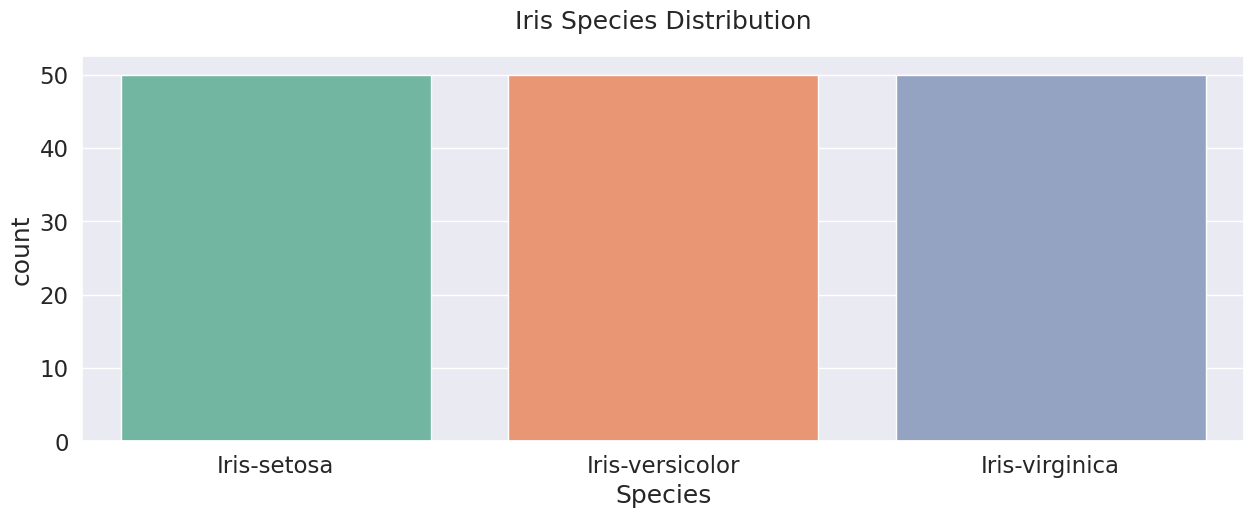

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Species"],data=df,palette="Set2") # Pass df["Species"] as the x argument
plt.title("Iris Species Distribution",pad=20)
plt.show()

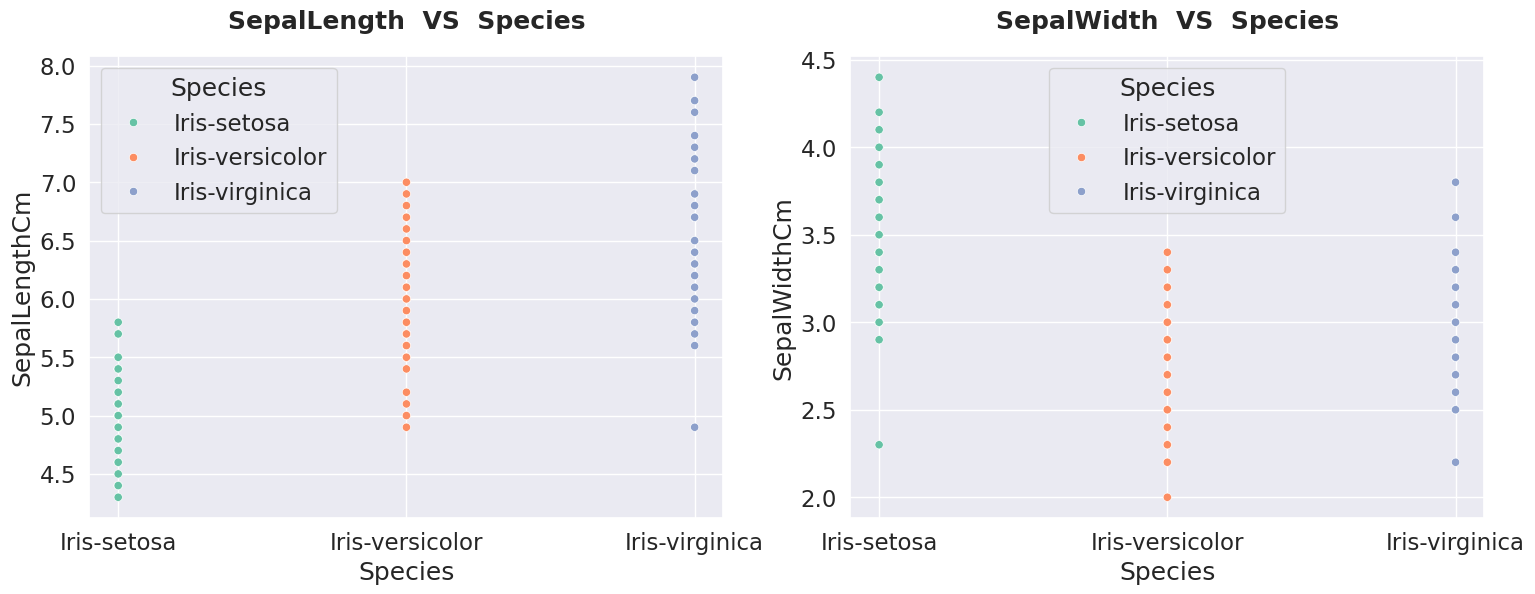

In [70]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x="Species", y="SepalLengthCm", data=df, hue="Species", palette="Set2") # Pass 'Species' as x and 'SepalLengthCm' as y
plt.title("SepalLength  VS  Species", pad=20, fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot(x="Species", y="SepalWidthCm", data=df, hue="Species", palette="Set2") # Pass 'Species' as x and 'SepalWidthCm' as y
plt.title("SepalWidth  VS  Species", pad=20, fontweight="black")
plt.show()

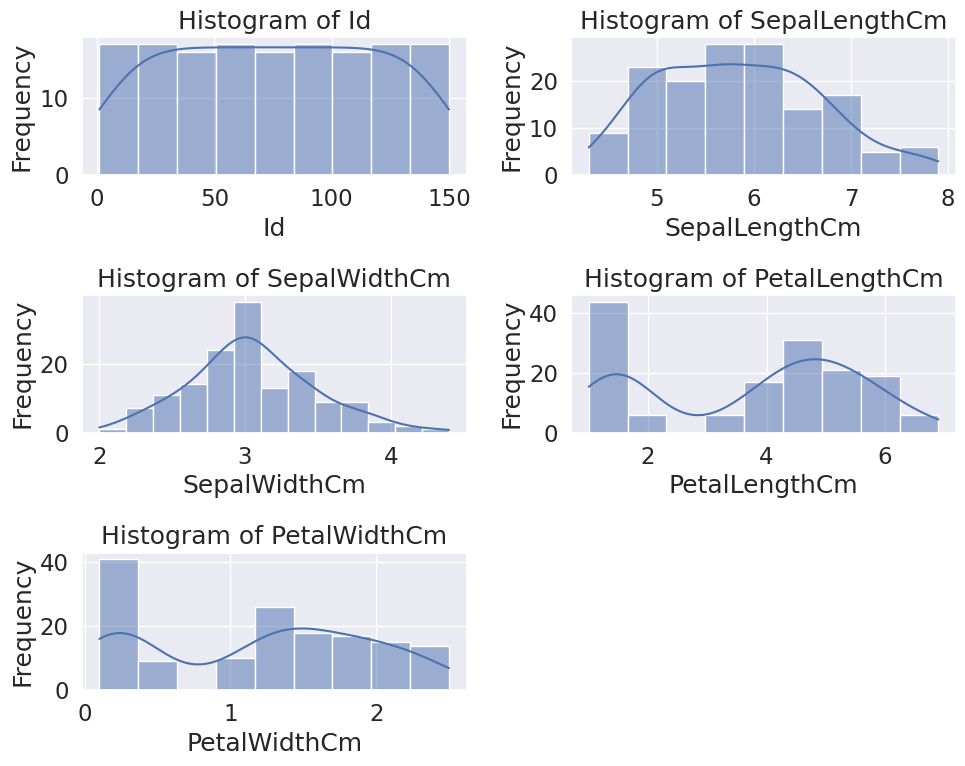

In [71]:
plt.figure(figsize=(10, 8))
num_cols = len(df.columns[:-1])  # Get the total number of features to plot
num_rows = int(np.ceil(num_cols / 2))  # Calculate the number of rows needed
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 2, i + 1)  # Dynamically adjust subplot grid
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

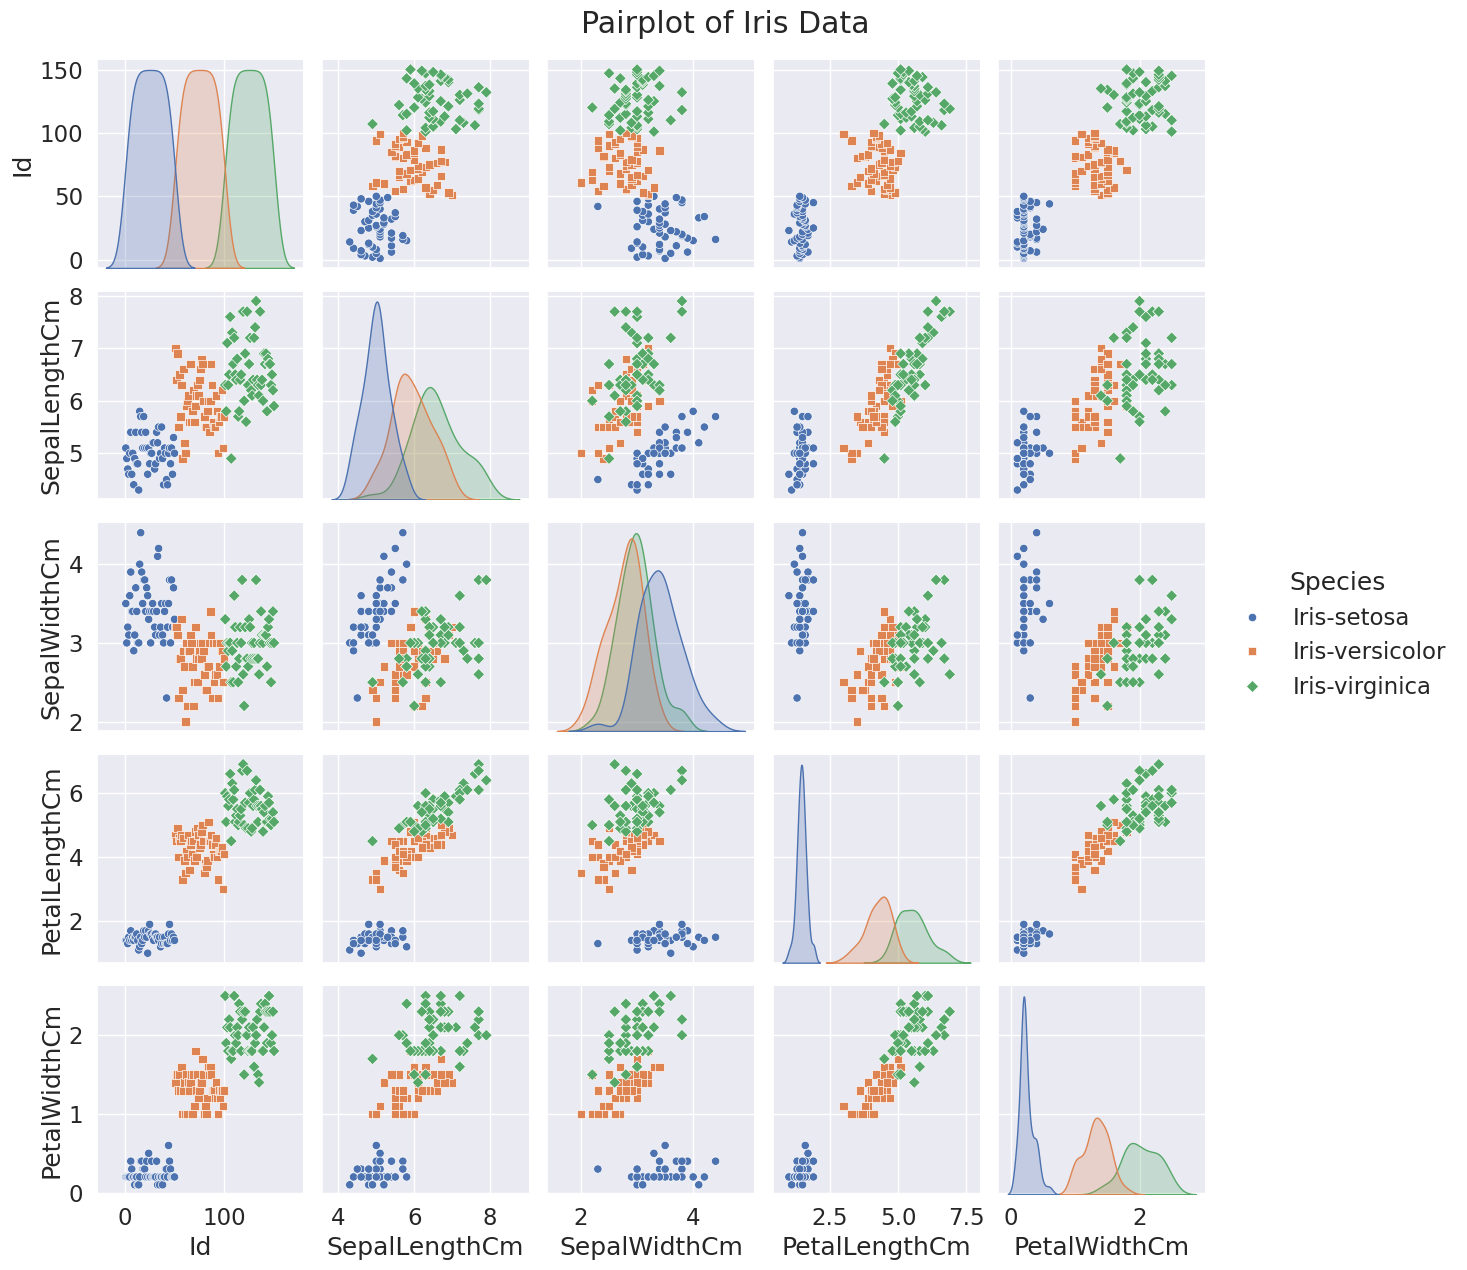

In [72]:
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])#marker is defined the shape
plt.suptitle("Pairplot of Iris Data", y=1.02)
plt.show()

In [73]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
# redefine the loaded data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound))

# Display the outliers
outlier_values = df[outliers.any(axis=1)]
print(outlier_values)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0


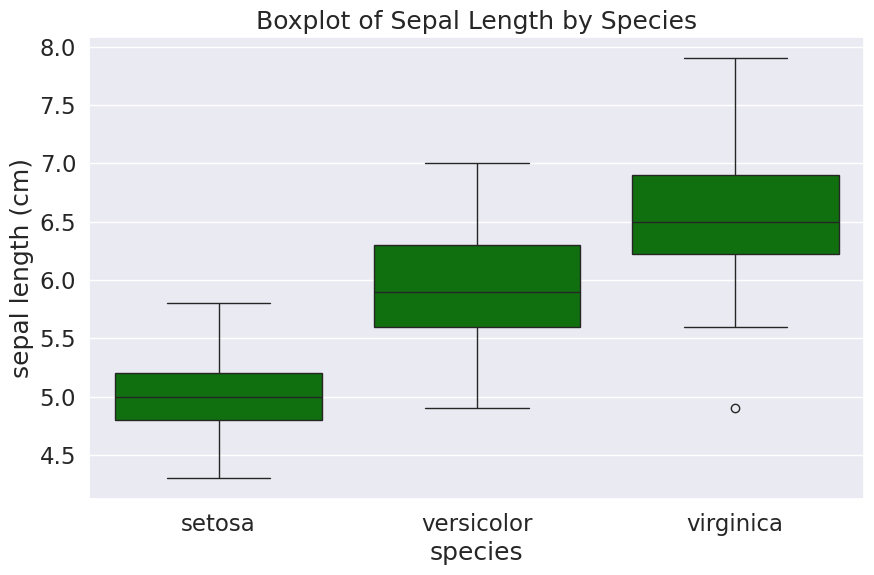

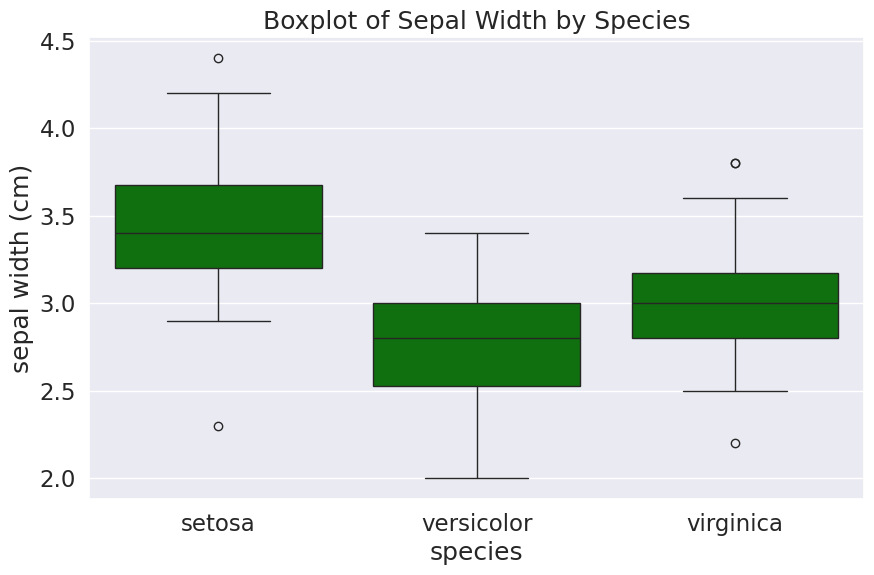

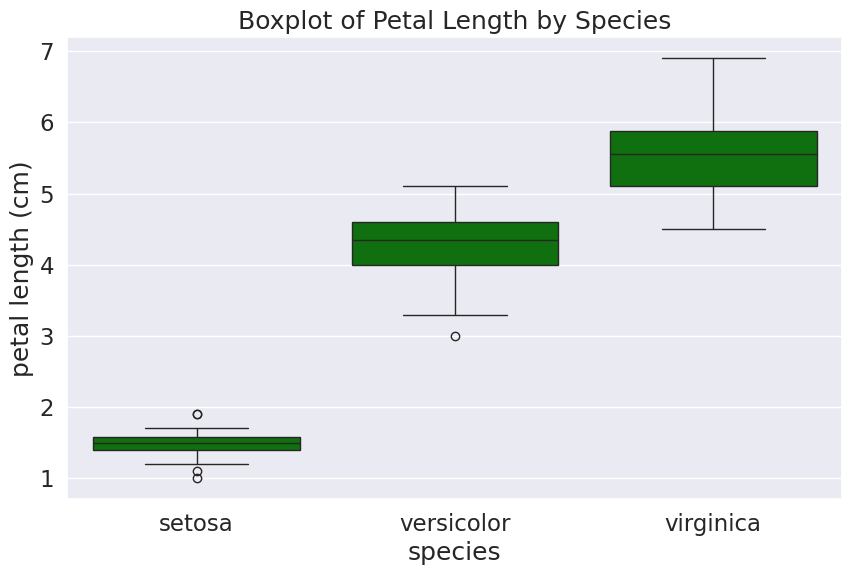

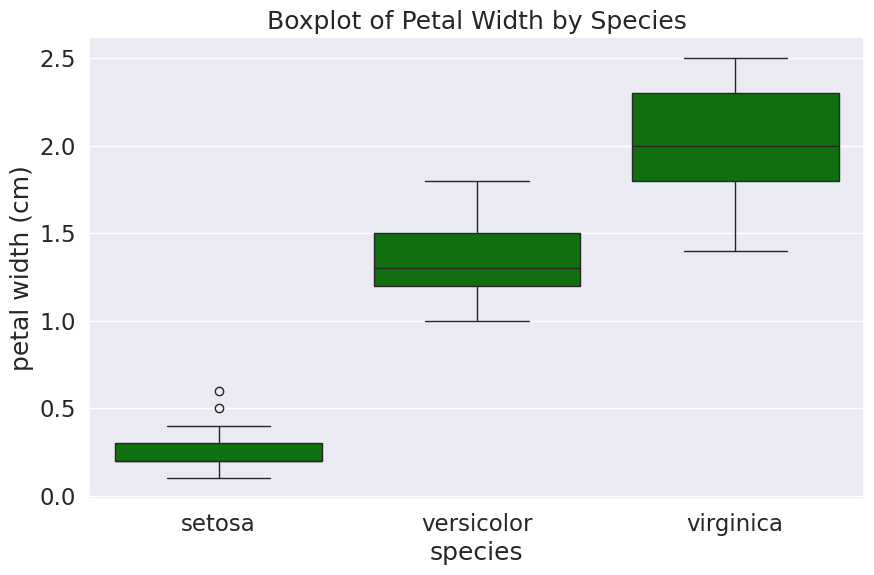

In [74]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df,color='green',)
plt.title("Boxplot of Sepal Length by Species")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df,color='green')
plt.title("Boxplot of Sepal Width by Species")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=iris_df,color='green')
plt.title("Boxplot of Petal Length by Species")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=iris_df,color='green')
plt.title("Boxplot of Petal Width by Species")
plt.show()


In [75]:
Iris_data=df[['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']]

In [76]:
Iris_data

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [77]:
corr_matrix = Iris_data.corr()
print(corr_matrix)

                   petal length (cm)  petal width (cm)  sepal length (cm)  \
petal length (cm)           1.000000          0.962865           0.871754   
petal width (cm)            0.962865          1.000000           0.817941   
sepal length (cm)           0.871754          0.817941           1.000000   
sepal width (cm)           -0.428440         -0.366126          -0.117570   

                   sepal width (cm)  
petal length (cm)         -0.428440  
petal width (cm)          -0.366126  
sepal length (cm)         -0.117570  
sepal width (cm)           1.000000  


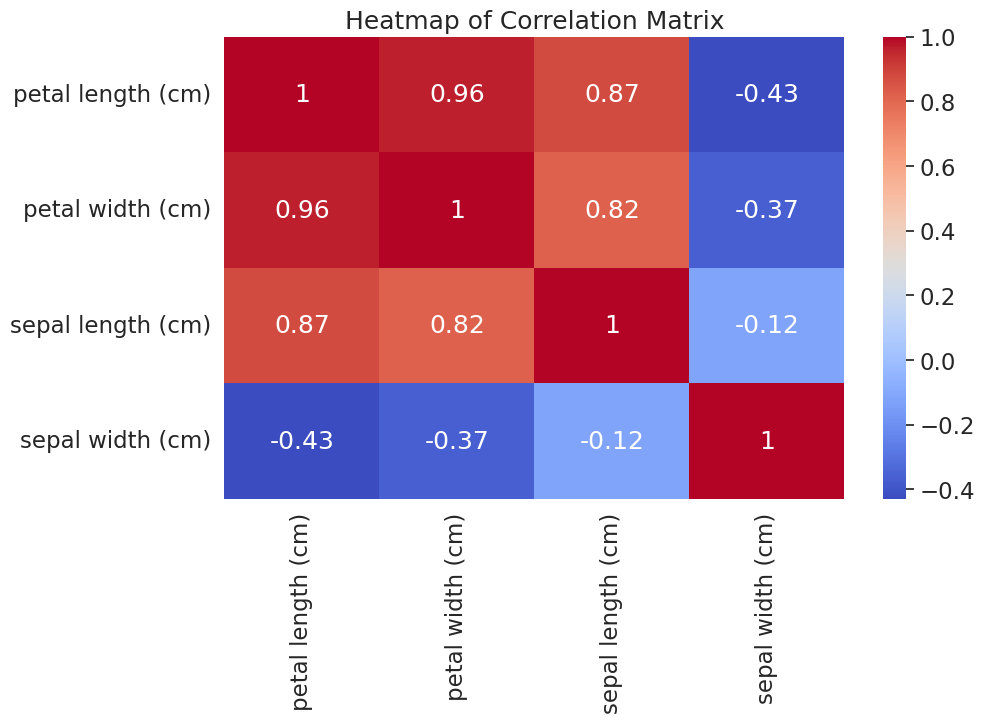

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

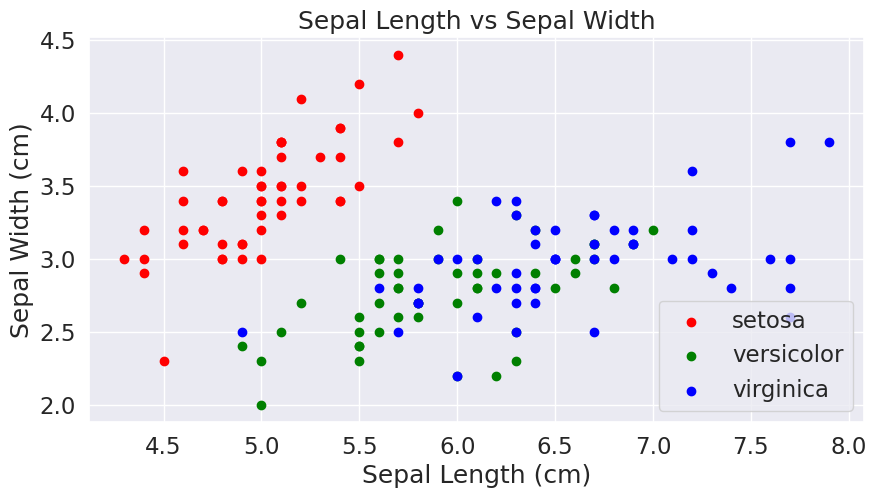

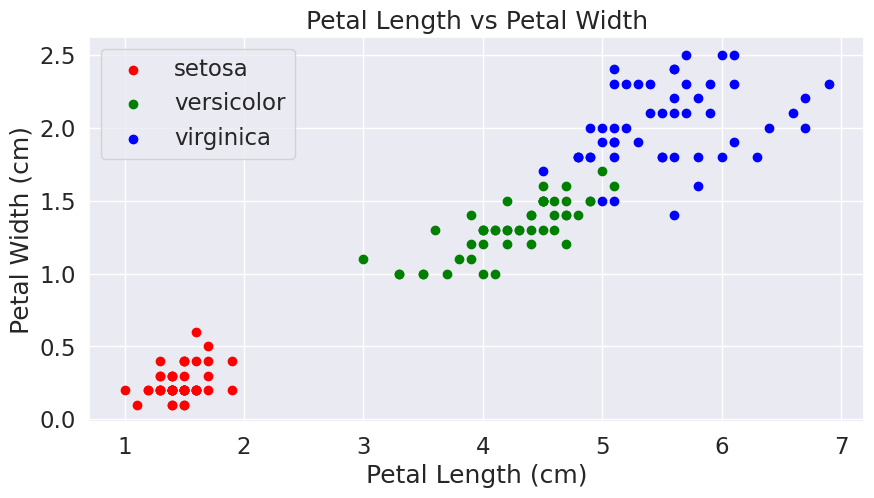

In [79]:
plt.figure(figsize=(10, 5))
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species, color in colors.items():
    subset = iris_df[iris_df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species, color=color)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

# Scatter plot for Petal length vs Petal width
plt.figure(figsize=(10, 5))
for species, color in colors.items():
    subset = iris_df[iris_df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species, color=color)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()